In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [13]:
claim=pd.read_csv("/content/claimants (1) (1).csv")
claim.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [14]:
#removing casenubmer column as it is unecessary
claim.drop(["CASENUM"], inplace=True,axis=1)

In [15]:
claim.shape

(1340, 6)

In [17]:
claim=claim.dropna()
claim.shape

(1096, 6)

In [20]:
x=claim.iloc[:,1:]
y=claim.iloc[:,0]

In [21]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [22]:
y_pred=classifier.predict(x)

In [23]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [26]:
y_pred_df=pd.DataFrame({'actual':y, 'predicted_prob':y_pred})

In [27]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [30]:
((381+395)/(381+395+197+123))*100

70.8029197080292

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



ROC curve

Text(0, 0.5, 'True Positive Rate')

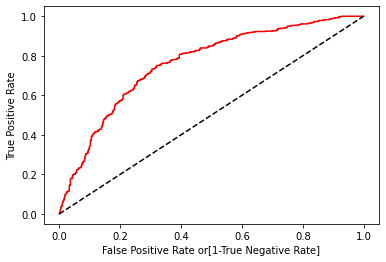

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red', label='logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or[1-True Negative Rate]')
plt.ylabel('True Positive Rate')

In [39]:
auc

0.7108589063606365